# MNIST
In diesen notebook werden die Daten heruntergeladen und gesichtet

In [1]:
# Imports
import urllib.request # für den Download
import os # Für den Download
import patoolib # für das entpacken der Daten || pip install patool
from mlxtend.data import loadlocal_mnist # für das Laden der Train & Testdaten
import matplotlib.pyplot as plt
import random # bei der darstellung der Testbilder, sodass nicht immer die gleichan angezeigt werden

# Download Data
Die daten werden von der Webseite " http://yann.lecun.com/exdb/mnist/ " in das Data-Directory heruntergeladen. Dieser Download findet aber nur statt, wenn die Daten noch nicht lokal am Rechner existieren. => im Git-Repo ist dieses Verzeichnis via .gitignore exkludiert  

In [2]:
listDownloadsAndNames = [
    ["http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz", "TrainImages"],
    ["http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz", "TrainLabels"],
    ["http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz", "TestImages"],
    ["http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz", "TestLabels"],
]

for test in range(0, len(listDownloadsAndNames),1):
    if(os.path.exists('./DATA/'+ str(listDownloadsAndNames[test][1]) +'.gz')):
        continue
    else:
        url = listDownloadsAndNames[test][0]
        urllib.request.urlretrieve(url, './DATA/'+ str(listDownloadsAndNames[test][1]) + '.gz')
        # für das Unzip kann man in Linux gunzip verwenden, das gibt es nicht in Windows
        # in windows verwenden wir patoolib
        patoolib.extract_archive('./DATA/'+ str(listDownloadsAndNames[test][1]) + '.gz', outdir="./DATA")

        
        

## Status
Ich habe soweit die Daten heruntergeladen und entpackt

# Laden der Train & Testdaten
hier werden nun die Daten in die entsprechenden Variablen geladen


In [3]:
print((train_X.shape))
print((train_y.shape))
print((test_X.shape))
print((test_y.shape))

NameError: name 'train_X' is not defined

In [4]:
train_X, train_y = loadlocal_mnist(
        images_path='./Data/train-images.idx3-ubyte', 
        labels_path='./Data/train-labels.idx1-ubyte')

test_X, test_y = loadlocal_mnist(
        images_path='./Data/t10k-images.idx3-ubyte', 
        labels_path='./Data/t10k-labels.idx1-ubyte')

In [5]:
num = 12
print(train_X[num])
print(train_y[num])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  12
  99  91 142 155 246 182 155 155 155 155 131  52   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 138 254 254 254 254 254 254 254 254
 254 254 254 252 210 122  33   0   0   0   0   0   0   0   0   0   0   0
   0 220 254 254 254 235 189 189 189 189 150 189 205 254 254 254  75   0
   0   0   0   0   0   0   0   0   0   0   0  35  74  35  35  25   0   0
   0   0   0   0  13 224 254 254 153   0   0   0   

## Status
Soweit sind nun die Daten allesamt als Numpy Araysgeladen,

# Prüfung ob alle Daten das gleiche shape haben
Für unsere weiterführende Modellierung ist es wichtig, dass alle Daten das gleiche Shape haben(Shape = Pixelhöhe * Pixelbreite).
Das kann bereits der Fall sein, muss aber im falle noch geprüft werden. Logischerweise muss dass nur für train_X & test_X durchgeführt machen, die Y data sind letztlich "nur die labels"

Bei ungleichheiten kann man wie folgt vorgehen:
* Reshaping => alle Dateien auf die gleiche Größe skalieren
* Rand auffüllen => hierbei werden die größten Dimnesionen gesucht, und alle Bilder die kleinere Dimensionen aufweisen mit einem Leeren Rand aufgefüllt

In [10]:
# hier noch eine Function um zu prüfen ob die Bilder alle den gleichen Shape habe
def checkConsistency(test):
    for testPicture in range(0, len(test_X),1):
        if((train_X[testPicture].shape)[0] == 784):
            continue
        else:
            print(testPicture)
checkConsistency(train_X)
checkConsistency(test_X)
            

## Status
Ohne eine weitere Vorverarbeitung sind die vorliegenden Daten im gleichen "shape". das heist ich muss in diesem Falle keine weiteren Änderungen vornehmen

# Prüfung der Daten
im folgenden können wir die Bilder einmal laden um die Bilder "menschlich zu sichten" und die Reihenfolge gegenzuprüfen. Es wäre letzlich nicht sinnvoll wenn die datensätze sequentiell wären, sprich wenn in den Tesdatensatz nur 8 und 9 aber nicht im train vorkäme. Zeitgleich prüfe ich (human-visuell) an dieser Stelle ob ich auch die richtigen Labels hab, dazu lass ich mir auch die Labels der Bilder ausgeben 

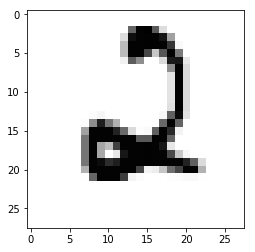

2
###############################################


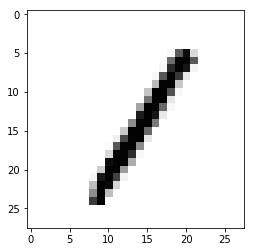

1
###############################################


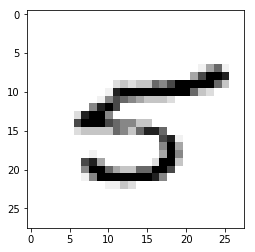

5
###############################################


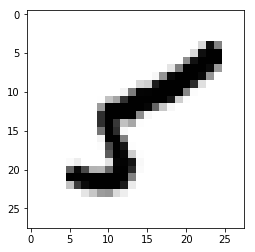

5
###############################################


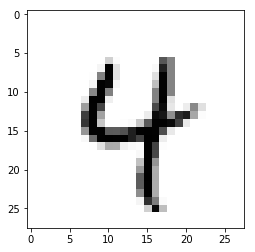

4
###############################################


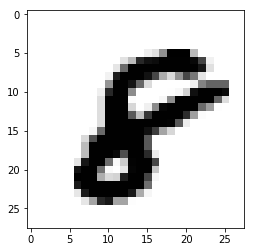

8
###############################################


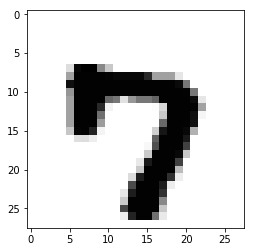

7
###############################################


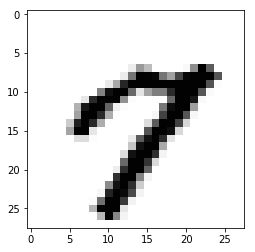

7
###############################################


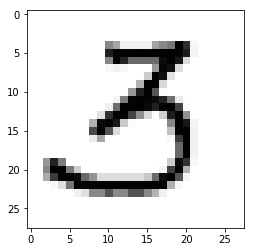

3
###############################################


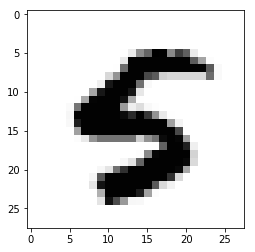

5
###############################################


In [7]:
for i in range(10):
    # Zufallszahl, sodass ich nicht immer nur die ersten 10 sichte
    j = random.randint(0, 60000)
    img = train_X[j].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()
    print(train_y[j])
    print("###############################################")

## Beispielbilder, welche wir in den folgenden Modellierungen immer mal wieder brauchen

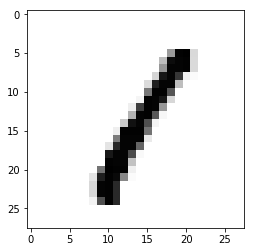

1
###############################################


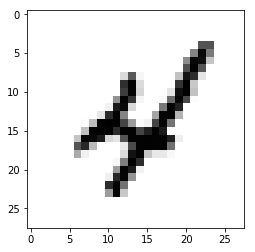

4
###############################################


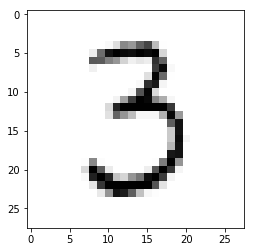

3
###############################################


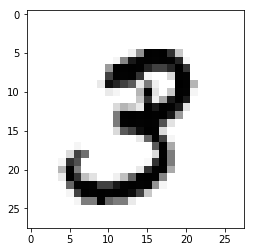

3
###############################################


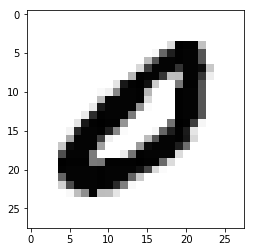

0
###############################################


In [12]:
bspImgs= [3,9,50,5001,3490]
# das sind [1,4,3,3,0] 
for i in range(len(bspImgs)):
    j = bspImgs[i]
    img = train_X[j].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()
    print(train_y[j])
    print("###############################################")

## Status
Die Daten sind somit ausreichend Vorverarbeitet, sodass eine Modellierung beginnen kann. Dies ist normalerweise nicht der Fall. Da MNIST aber in gewissen Grade das "Hello-World" der CNNs ist, belästigt man den Lernenden zunächst nicht mit dem "Data-Preprocessing-Overhead"